<a href="https://colab.research.google.com/github/SatayamMishra/Task-A2NG/blob/main/A2NG_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Assignment**
## **Satyam Mishra**

# **Import all Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment/1.csv")

In [3]:
df.head()

,Date,Y,X1,X2,X3,X4,X5
0,10/24/2004,0.050687,0.034394,-0.016929,-0.3691,-4.325,0.422199
1,10/31/2004,0.070429,0.031546,0.088467,-0.3865,-4.500,0.309839
2,11/7/2004,0.147582,0.046045,0.092360,-0.3802,-4.760,0.217130
3,11/14/2004,0.155949,0.044735,0.096254,-0.4095,-5.020,0.135458
4,11/21/2004,0.111819,0.033630,0.100147,-0.3440,-5.280,0.181475


In [4]:
df.shape

(920, 7)

# **Checking Any Null Value**

In [5]:
df.isna().any()

Date    False
Y       False
X1      False
X2      False
X3      False
X4      False
X5      False
dtype: bool

# **Calculate the correlation matrix**

In [6]:
corr_matrix = df[['X1', 'X2', 'X3', 'X4', 'X5']].corr()

# Display the correlation matrix
print(corr_matrix)

          X1        X2        X3        X4        X5
X1  1.000000 -0.307005  0.066353  0.287839  0.378803
X2 -0.307005  1.000000  0.001023 -0.360993 -0.227640
X3  0.066353  0.001023  1.000000 -0.097333 -0.013056
X4  0.287839 -0.360993 -0.097333  1.000000  0.363809
X5  0.378803 -0.227640 -0.013056  0.363809  1.000000


## **Calculate the VIF for each independent variable**

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = df[['X1', 'X2', 'X3', 'X4', 'X5']].columns
vif["VIF"] = [variance_inflation_factor(df[['X1', 'X2', 'X3', 'X4', 'X5']].values, i) for i in range(len(df[['X1', 'X2', 'X3', 'X4', 'X5']].columns))]

# Display the VIF dataframe
print(vif)

  variables       VIF
0        X1  1.266508
1        X2  1.216159
2        X3  1.019086
3        X4  1.300098
4        X5  1.269872


## **Fit the OLS regression model**

In [8]:
import statsmodels.api as sm
# create X and y arrays
X = df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = df['Y']

# add constant to X
X = sm.add_constant(X)

# fit OLS model
model = sm.OLS(y, X).fit()

### **To check for homoscedasticity, we can plot the residuals against the predicted values**


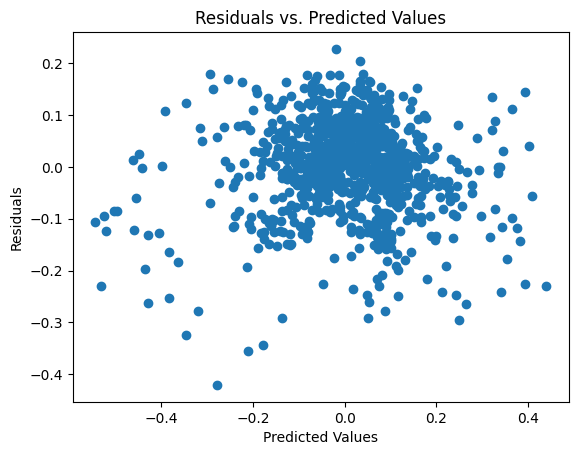

In [9]:
plt.scatter(model.predict(X), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

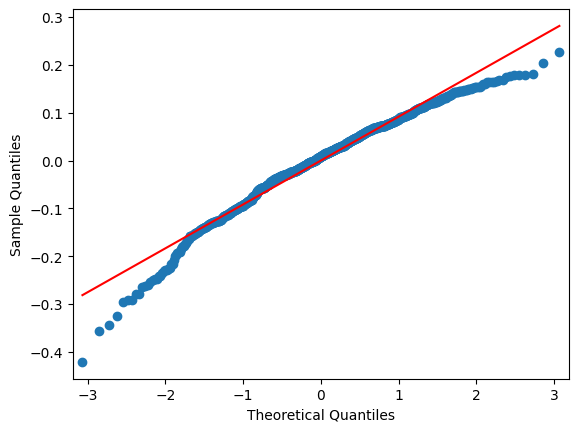

-7.617698742332935e-18

In [10]:
import pylab
#Check for the normality of the residuals
sm.qqplot(model.resid, line='s')
pylab.show()

# check that mean of residuals is approx zero
mean_residuals= sum(model.resid)/len(model.resid)
mean_residuals

## **Check Ordinary least squares Model summary**

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     409.1
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          2.81e-230
Time:                        19:22:46   Log-Likelihood:                 892.29
No. Observations:                 920   AIC:                            -1773.
Df Residuals:                     914   BIC:                            -1744.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.003      1.154      0.2

**==>>From the summary table, we can see that the R-squared value is 0.691, indicating that the model explains 69.1% of the variance in the dependent variable. The F-statistic has a p-value of 2.81e-230, indicating that the overall model is statistically significant.**